In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import optimize

# 27. Метод разделимых наименьших квадратов. Квантовые дефекты


### Постановка задачи:

Методом разделимых наименьших квадратов
построить модель вида
$$
y = \beta_1 - \beta_2 x - \frac{\arctan(\frac{\beta_3}{x-\beta_4})}{\pi}
$$
для данных из исследований квантовых дефектов в атомах йода.
Предиктор $x$ – возбужденное состояние энергии, 
переменная отклика $y$ – число квантовых дефектов.
```
           x             y      
       -4868.68      0.252429  
       -4868.09      0.252141  
       -4867.41      0.251809  
       -3375.19      0.297989  
       -3373.14      0.296257  
       -3372.03      0.295319  
       -2473.74      0.339603  
       -2472.35      0.337731  
       -2469.45      0.333820  
       -1894.65      0.389510  
       -1893.40      0.386998  
       -1497.24      0.438864  
       -1495.85      0.434887  
       -1493.41      0.427893  
       -1208.68      0.471568  
       -1206.18      0.461699  
       -1206.04      0.461144  
        -997.92      0.513532  
        -996.61      0.506641  
        -996.31      0.505062  
        -834.94      0.535648  
        -834.66      0.533726  
        -710.03      0.568064  
        -530.16      0.612886  
        -464.17      0.624169  
```
Сравнить результат с аппроксимацией квадратным многочленом.
Изобразить данные и построить графики найденных функций.

## Ввод исходных данных:

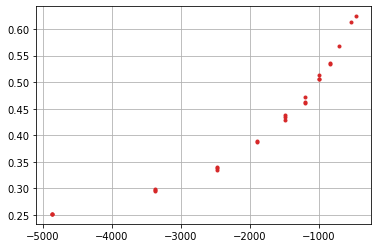

In [3]:
x = np.array([-4868.68, -4868.09, -4867.41, -3375.19, -3373.14, -3372.03, -2473.74, -2472.35, -2469.45,-1894.65,-1893.40,-1497.24,-1495.85,-1493.41,-1208.68,-1206.18,-1206.04,-997.92,-996.61,-996.31, -834.94,-834.66,-710.03,-530.16,-464.17])
y = np.array([0.252429 , 0.252141, 0.251809, 0.297989, 0.296257,0.295319,0.339603,0.337731,0.333820,0.389510,0.386998,0.438864,0.434887,0.427893,0.471568,0.461699 ,0.461144,0.513532,0.506641,0.505062,0.535648,0.533726,0.568064,0.612886,0.624169])
plt.plot(x, y, '.', color='tab:red')
plt.grid()
pass

### Нелинейный метод наименьших квадратов:

In [4]:
def funct(x, b1, b2, b3, b4):
    return b1 - b2 * x - (np.arctan(b3/(x - b4))/math.pi)

In [5]:
funct(1,3,4,5,5)

-0.7147767125227227

In [6]:
res, _ = optimize.curve_fit(funct,x,y)
b1,b2,b3,b4 = res;
b1,b2,b3,b4

(0.2019684894050175,
 -6.1953246821417266e-06,
 1204.4563632015252,
 -181.343091966604)

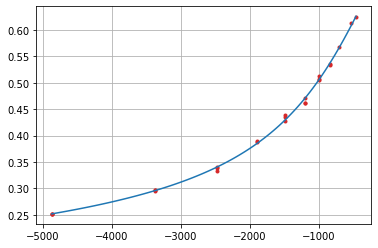

In [7]:
xx = np.linspace(np.min(x), np.max(x), 100)
yy = b1 - b2 * xx - (np.arctan(b3/(xx - b4))/math.pi)
plt.plot(x, y, '.', color='tab:red')
plt.plot(xx, yy)
plt.grid()
pass

### Аппроксимация квадратным многочленом:
$$
{\rm y} = \beta_0 + \beta_1 {\rm x} + \beta_2 {\rm x}^2
$$

In [8]:
beta2, beta1, beta0 = np.polyfit(x, y, 2)

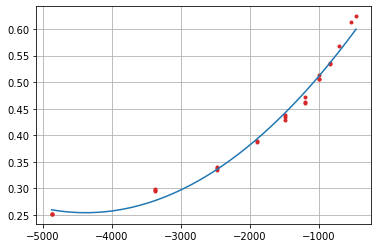

In [9]:
X = np.linspace(np.min(x), np.max(x), 100)
Y = beta0 + beta1 * X + beta2*(X**2)
plt.plot(x, y, '.', color='tab:red')
plt.plot(X, Y)
plt.grid()
pass

#### По графикам видно, что аппроксимация данных нелинейным методом наименьших квадратов точнее, чем аппроксимация квадратным многочленом